# Python Tutorial - How to work with CoastWatch data in Python

This tutorial is based on the OceanWatch tutorial meterial edited with Great Lakes data. This tutorial will show the steps to grab data in ERDDAP from Python, how to work with NetCDF files in Python and how to make some maps and time-series water surface temperature (sst) in Lake Erie.

## 1. Downlading data from Python

Because ERDDAP includes RESTful services, you can download data listed on any ERDDAP platform from Python using the URL structure. For example, the following page allows you to subset daily water surface temperature data from the dataset GLSEA_ACSPO_GCS

![](gl_erddap_glsea.png)

In this specific example, the URL we generated is :

https://apps.glerl.noaa.gov/erddap/griddap/GLSEA_ACSPO_GCS.nc?sst%5B(2023-06-01T12:00:00Z):1:(2023-06-30T12:00:00Z)%5D%5B(41):1:(43)%5D%5B(-83.5):1:(-78.5)%5D


In Python, run the following to download the data using the generated URL. **Note:** replace coastwatch.glerl.noaa.gov with apps.glerl.noaa.gov) :


In [36]:
import urllib.request

url="https://apps.glerl.noaa.gov/erddap/griddap/GLSEA_ACSPO_GCS.nc?sst%5B(2023-06-01T12:00:00Z):1:(2023-06-30T12:00:00Z)%5D%5B(41):1:(43)%5D%5B(-83.5):1:(-78.5)%5D"
urllib.request.urlretrieve(url, "e_sst.nc")

('e_sst.nc', <http.client.HTTPMessage at 0x1b7d5152610>)

# 2. Importing NetCDF4 data in Python

Now that we've downloaded the data locally, we can import it and extract our variables of interest.

The xarray package makes it very convenient to work with NetCDF files. Documentation is available here:
http://xarray.pydata.org/en/stable/why-xarray.html

In [37]:
import xarray as xr
import netCDF4 as nc

#### - Open the file and load it as an xarray dataset:

In [38]:
ds = xr.open_dataset('e_sst.nc',decode_cf=False)
#ds = xr.open_dataset('e_sst.nc')

#### - Examine the data structure:

In [39]:
ds

<xarray.Dataset>
Dimensions:    (time: 30, latitude: 143, longitude: 358)
Coordinates:
  * time       (time) float64 1.686e+09 1.686e+09 ... 1.688e+09 1.688e+09
  * latitude   (latitude) float64 41.01 41.02 41.03 41.05 ... 42.97 42.98 43.0
  * longitude  (longitude) float64 -83.51 -83.49 -83.48 ... -78.53 -78.52 -78.5
Data variables:
    sst        (time, latitude, longitude) float32 ...
Attributes: (12/37)
    cdm_data_type:                             Grid
    Conventions:                               CF-1.6, COARDS, ACDD-1.3
    Easternmost_Easting:                       -78.5025420282523
    GDAL:                                      GDAL 3.4.3, released 2022/04/22
    geospatial_lat_max:                        42.9955492889468
    geospatial_lat_min:                        41.0053458284746
    ...                                        ...
    summary:                                   Sea Surface Temperature (SST) ...
    testOutOfDate:                             now-3days
    time_coverage_end:                         2023-06-30T12:00:00Z
    time_coverage_start:                       2023-06-01T12:00:00Z
    title:                                     Sea Surface Temperature (SST) ...
    Westernmost_Easting:                       -83.5060817140874

In [40]:
print(ds)

<xarray.Dataset>
Dimensions:    (time: 30, latitude: 143, longitude: 358)
Coordinates:
  * time       (time) float64 1.686e+09 1.686e+09 ... 1.688e+09 1.688e+09
  * latitude   (latitude) float64 41.01 41.02 41.03 41.05 ... 42.97 42.98 43.0
  * longitude  (longitude) float64 -83.51 -83.49 -83.48 ... -78.53 -78.52 -78.5
Data variables:
    sst        (time, latitude, longitude) float32 ...
Attributes: (12/37)
    cdm_data_type:                             Grid
    Conventions:                               CF-1.6, COARDS, ACDD-1.3
    Easternmost_Easting:                       -78.5025420282523
    GDAL:                                      GDAL 3.4.3, released 2022/04/22
    geospatial_lat_max:                        42.9955492889468
    geospatial_lat_min:                        41.0053458284746
    ...                                        ...
    summary:                                   Sea Surface Temperature (SST) ...
    testOutOfDate:                             now-3days
    

#### - Examine which coordinates and variables are included in the dataset:

In [41]:
#ds.dims

In [42]:
ds.coords

Coordinates:
  * time       (time) float64 1.686e+09 1.686e+09 ... 1.688e+09 1.688e+09
  * latitude   (latitude) float64 41.01 41.02 41.03 41.05 ... 42.97 42.98 43.0
  * longitude  (longitude) float64 -83.51 -83.49 -83.48 ... -78.53 -78.52 -78.5

In [43]:
ds.data_vars

Data variables:
    sst      (time, latitude, longitude) float32 ...

In [44]:
ds.attrs

{'cdm_data_type': 'Grid',
 'Conventions': 'CF-1.6, COARDS, ACDD-1.3',
 'Easternmost_Easting': -78.5025420282523,
 'GDAL': 'GDAL 3.4.3, released 2022/04/22',
 'geospatial_lat_max': 42.9955492889468,
 'geospatial_lat_min': 41.0053458284746,
 'geospatial_lat_resolution': 0.014015517327269056,
 'geospatial_lat_units': 'degrees_north',
 'geospatial_lon_max': -78.5025420282523,
 'geospatial_lon_min': -83.5060817140874,
 'geospatial_lon_resolution': 0.01401551732726889,
 'geospatial_lon_units': 'degrees_east',
 'grid_mapping_GeoTransform': '-92.42695849289404 0.01401551732726498 0 50.61298295630733 0 -0.01401551732726498',
 'grid_mapping_inverse_flattening': 298.257223563,
 'grid_mapping_long_name': 'CRS definition',
 'grid_mapping_longitude_of_prime_meridian': 0.0,
 'grid_mapping_name': 'latitude_longitude',
 'grid_mapping_semi_major_axis': 6378137.0,
 'grid_mapping_spatial_ref': 'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EP

#### - Examine the structure of sst:

In [45]:
ds.sst.shape

(30, 143, 358)

Our dataset is a 3-D array with 143 rows corresponding to latitudes and 358 columns corresponding to longitudes,  for each of the 30 time steps.

#### - Get the dates for each time step:

In [46]:
ds.time

<xarray.DataArray 'time' (time: 30)>
array([1.685621e+09, 1.685707e+09, 1.685794e+09, 1.685880e+09, 1.685966e+09,
       1.686053e+09, 1.686139e+09, 1.686226e+09, 1.686312e+09, 1.686398e+09,
       1.686485e+09, 1.686571e+09, 1.686658e+09, 1.686744e+09, 1.686830e+09,
       1.686917e+09, 1.687003e+09, 1.687090e+09, 1.687176e+09, 1.687262e+09,
       1.687349e+09, 1.687435e+09, 1.687522e+09, 1.687608e+09, 1.687694e+09,
       1.687781e+09, 1.687867e+09, 1.687954e+09, 1.688040e+09, 1.688126e+09])
Coordinates:
  * time     (time) float64 1.686e+09 1.686e+09 ... 1.688e+09 1.688e+09
Attributes:
    _CoordinateAxisType:  Time
    actual_range:         [1.6856208e+09 1.6881264e+09]
    axis:                 T
    calendar:             Gregorian
    ioos_category:        Time
    long_name:            Easten Time
    standard_name:        time
    time_origin:          01-JAN-1970 00:00:00
    units:                seconds since 1970-01-01T00:00:00Z

In [47]:
ds.time.attrs

{'_CoordinateAxisType': 'Time',
 'actual_range': array([1.6856208e+09, 1.6881264e+09]),
 'axis': 'T',
 'calendar': 'Gregorian',
 'ioos_category': 'Time',
 'long_name': 'Easten Time',
 'standard_name': 'time',
 'time_origin': '01-JAN-1970 00:00:00',
 'units': 'seconds since 1970-01-01T00:00:00Z'}

#### the time units is seconds, we need to convert the seconds to dates.

In [48]:
dates=nc.num2date(ds.time,ds.time.units,only_use_cftime_datetimes=False, 
                        only_use_python_datetimes=True )
dates

array([real_datetime(2023, 6, 1, 12, 0), real_datetime(2023, 6, 2, 12, 0),
       real_datetime(2023, 6, 3, 12, 0), real_datetime(2023, 6, 4, 12, 0),
       real_datetime(2023, 6, 5, 12, 0), real_datetime(2023, 6, 6, 12, 0),
       real_datetime(2023, 6, 7, 12, 0), real_datetime(2023, 6, 8, 12, 0),
       real_datetime(2023, 6, 9, 12, 0),
       real_datetime(2023, 6, 10, 12, 0),
       real_datetime(2023, 6, 11, 12, 0),
       real_datetime(2023, 6, 12, 12, 0),
       real_datetime(2023, 6, 13, 12, 0),
       real_datetime(2023, 6, 14, 12, 0),
       real_datetime(2023, 6, 15, 12, 0),
       real_datetime(2023, 6, 16, 12, 0),
       real_datetime(2023, 6, 17, 12, 0),
       real_datetime(2023, 6, 18, 12, 0),
       real_datetime(2023, 6, 19, 12, 0),
       real_datetime(2023, 6, 20, 12, 0),
       real_datetime(2023, 6, 21, 12, 0),
       real_datetime(2023, 6, 22, 12, 0),
       real_datetime(2023, 6, 23, 12, 0),
       real_datetime(2023, 6, 24, 12, 0),
       real_datetime(2023, 6,

The datetime object includes year, month, hour, minutes, eg. 2021, 6, 12, 0.

## Working with the extracted data

### Creating a map for one time step

Let's create a map of SST for June 1, 2021 (our first time step).

In [49]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
#np.warnings.filterwarnings('ignore')

#### - Examine the values of sst:

In [50]:
ds.sst.values

array([[[-99999., -99999., -99999., ..., -99999., -99999., -99999.],
        [-99999., -99999., -99999., ..., -99999., -99999., -99999.],
        [-99999., -99999., -99999., ..., -99999., -99999., -99999.],
        ...,
        [-99999., -99999., -99999., ..., -99999., -99999., -99999.],
        [-99999., -99999., -99999., ..., -99999., -99999., -99999.],
        [-99999., -99999., -99999., ..., -99999., -99999., -99999.]],

       [[-99999., -99999., -99999., ..., -99999., -99999., -99999.],
        [-99999., -99999., -99999., ..., -99999., -99999., -99999.],
        [-99999., -99999., -99999., ..., -99999., -99999., -99999.],
        ...,
        [-99999., -99999., -99999., ..., -99999., -99999., -99999.],
        [-99999., -99999., -99999., ..., -99999., -99999., -99999.],
        [-99999., -99999., -99999., ..., -99999., -99999., -99999.]],

       [[-99999., -99999., -99999., ..., -99999., -99999., -99999.],
        [-99999., -99999., -99999., ..., -99999., -99999., -99999.],
    

In [51]:
ds.sst.attrs

{'_FillValue': -99999.0,
 'colorBarMaximum': 32.0,
 'colorBarMinimum': 0.0,
 'ioos_category': 'Temperature',
 'long_name': 'Temperature',
 'standard_name': 'sea_water_temperature',
 'units': 'degree_C'}

In [52]:
ds.sst.attrs['_FillValue']

-99999.0

In [53]:
#ds.sst.dims
#ds.sst.coords

#### - Make a new sst DataArray and replace _fillValue with NaN

In [54]:
#nan_sst = ds.sst.where(ds.sst.values != -99999.0)
nan_sst = ds.sst.where(ds.sst.values != ds.sst.attrs['_FillValue'])

# nan_sst[time][latitude][longitude]
#print(nan_sst[10][100][200])

print(nan_sst)



<xarray.DataArray 'sst' (time: 30, latitude: 143, longitude: 358)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, na

#### - Set some color breaks

In [55]:
np.nanmin(ds.sst)


-99999.0

In [56]:
# find min value in man_sst
np.nanmin(nan_sst)

13.25

In [57]:
np.nanmax(nan_sst)

23.35

In [58]:
levs = np.arange(13.25, 23.35, 0.05)
len(levs)

203

#### - Define a color palette

In [59]:
# init a color list
jet=["blue", "#007FFF", "cyan","#7FFF7F", "yellow", "#FF7F00", "red", "#7F0000"]


#### - Set color scale using the jet palette

In [60]:
cm = LinearSegmentedColormap.from_list('my_jet', jet, N=len(levs))

#https://www.youtube.com/watch?v=qk0n-YaKIkY

#### - plot the SST map

In [61]:
np.linspace(-82.5,-80,num=4)


array([-82.5       , -81.66666667, -80.83333333, -80.        ])

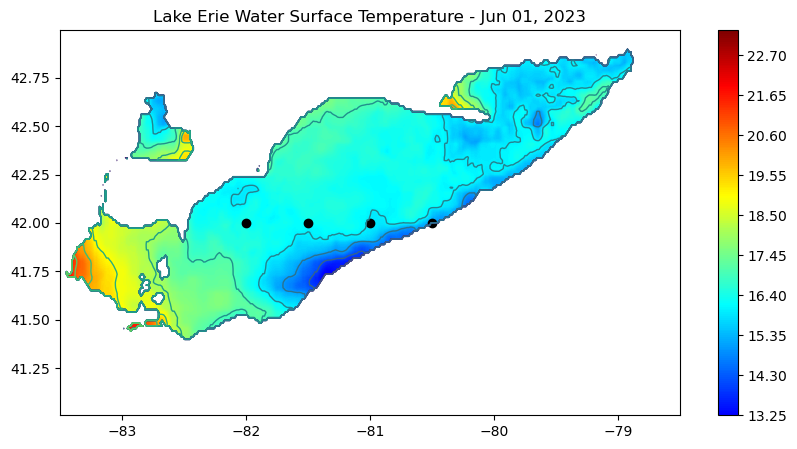

In [62]:
plt.subplots(figsize=(10, 5))

#plot first sst image: nan_sst[0,:,:]
plt.contourf(nan_sst.longitude, nan_sst.latitude, nan_sst[0,:,:], levs,cmap=cm)

#plot the color scale
plt.colorbar()

#example of how to add points to the map
plt.scatter(np.linspace(-82,-80.5,num=4),np.repeat(42,4),c='black')

#example of how to add a contour line
step = np.arange(9,26, 1)

plt.contour(ds.longitude, ds.latitude, ds.sst[0,:,:],levels=step,linewidths=1)

#plot title
plt.title("Lake Erie Water Surface Temperature - " + dates[0].strftime('%b %d, %Y'))
plt.show()


### Plotting a time series

Let's pick the following box : 41.75-42.0N, 83.0-83.5W. We are going to generate a time series of mean SST within that box.

#### - first, let's subset our data:

In [63]:
lat_bnds, lon_bnds = [41.75, 42.0], [-83.5, -83.0]
a_sst=nan_sst.sel(latitude=slice(*lat_bnds), longitude=slice(*lon_bnds))
print(a_sst)

<xarray.DataArray 'sst' (time: 30, latitude: 17, longitude: 36)>
array([[[  nan,   nan,   nan, ..., 18.86, 18.84, 18.84],
        [  nan,   nan,   nan, ..., 18.82, 18.8 , 18.8 ],
        [  nan,   nan,   nan, ..., 18.78, 18.76, 18.76],
        ...,
        [  nan,   nan,   nan, ..., 18.5 , 18.46, 18.46],
        [  nan,   nan,   nan, ..., 18.5 , 18.46, 18.46],
        [  nan,   nan,   nan, ..., 18.53, 18.49, 18.49]],

       [[  nan,   nan,   nan, ..., 19.45, 19.44, 19.44],
        [  nan,   nan,   nan, ..., 19.42, 19.41, 19.41],
        [  nan,   nan,   nan, ..., 19.39, 19.38, 19.38],
        ...,
        [  nan,   nan,   nan, ..., 19.13, 19.1 , 19.1 ],
        [  nan,   nan,   nan, ..., 19.07, 19.06, 19.06],
        [  nan,   nan,   nan, ..., 19.06, 19.04, 19.04]],

       [[  nan,   nan,   nan, ..., 19.63, 19.61, 19.61],
        [  nan,   nan,   nan, ..., 19.6 , 19.58, 19.58],
        [  nan,   nan,   nan, ..., 19.56, 19.54, 19.54],
        ...,
...
        ...,
        [  nan,   na

#### - let's plot the subset:

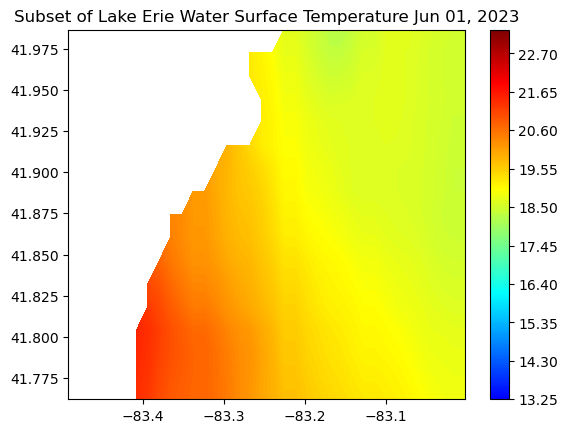

In [64]:
#plot first image of the a_sst array
plt.contourf(a_sst.longitude, a_sst.latitude, a_sst[0,:,:], levs,cmap=cm)
plt.colorbar()
plt.title("Subset of Lake Erie Water Surface Temperature " + dates[0].strftime('%b %d, %Y'))
plt.show()

#### - let's compute the daily mean over the bounding region:

In [65]:
res=np.nanmean(a_sst,axis=(1,2))
res


array([19.252283, 19.84715 , 20.109388, 20.06981 , 20.01454 , 20.00379 ,
       19.958447, 19.921082, 19.963646, 19.956564, 19.885717, 19.525248,
       19.253717, 19.179811, 19.149954, 19.190142, 19.41266 , 19.634283,
       19.90713 , 20.220236, 20.525293, 20.747812, 21.015364, 21.460989,
       21.71833 , 21.710024, 21.643694, 21.593224, 21.749012, 22.0068  ],
      dtype=float32)

#### - let's plot the time-series:

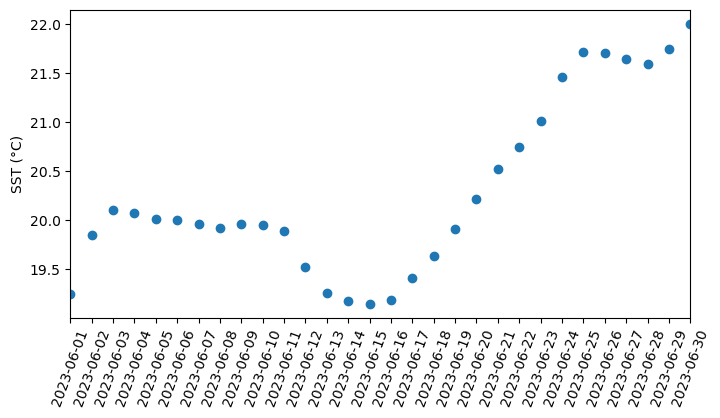

In [66]:
plt.figure(figsize=(8,4))

plt.scatter(dates,res)

degree_sign = u"\N{DEGREE SIGN}"
plt.ylabel('SST (' + degree_sign + 'C)')

plt.xlim(dates[0], dates[-1])

plt.xticks(dates,rotation=70, fontsize=10 )
plt.show()

### Creating a map of average SST over a month

#### - let's compute the monthly mean for the region:

In [67]:
import warnings

warnings.filterwarnings('ignore')
mean_sst=np.nanmean(nan_sst,axis=0)

In [68]:
mean_sst.shape

(143, 358)

#### - let's plot the map of the average SST in the region for 2021 June:

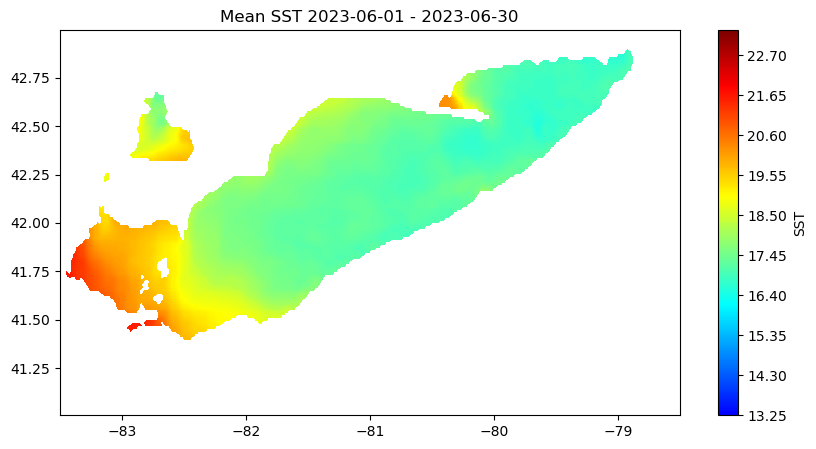

In [69]:
plt.subplots(figsize=(10, 5))

plt.contourf(ds.longitude, ds.latitude, mean_sst, levs,cmap=cm)

cbar = plt.colorbar()
cbar.set_label('SST')

plt.title("Mean SST " + dates[0].strftime('%Y-%m-%d')+' - '+dates[-1].strftime('%Y-%m-%d'))
plt.show()

In [70]:
!jupyter nbconvert --to html GL_python_tutorial1.ipynb

[NbConvertApp] Converting notebook GL_python_tutorial1.ipynb to html
[NbConvertApp] Writing 974120 bytes to GL_python_tutorial1.html
